In [26]:
# Importing helper visualisation functions
from minihack.tiles.rendering import get_des_file_rendering

import IPython.display
def render_des_file(des_file, **kwargs):
    image = get_des_file_rendering(des_file, **kwargs)
    IPython.display.display(image)

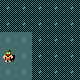

In [29]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
.....
.....
.....
.....
.....
ENDMAP
"""
render_des_file(des_file, n_images=1, full_screen=0)

Levels with geometry: GEOMETRY:left,top


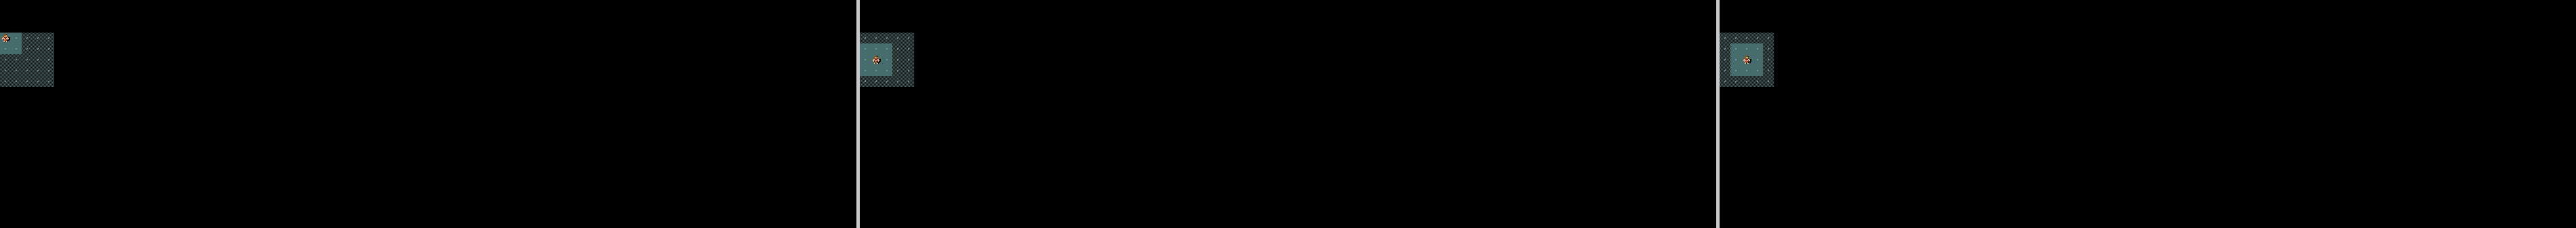

Levels with geometry: GEOMETRY:center,center


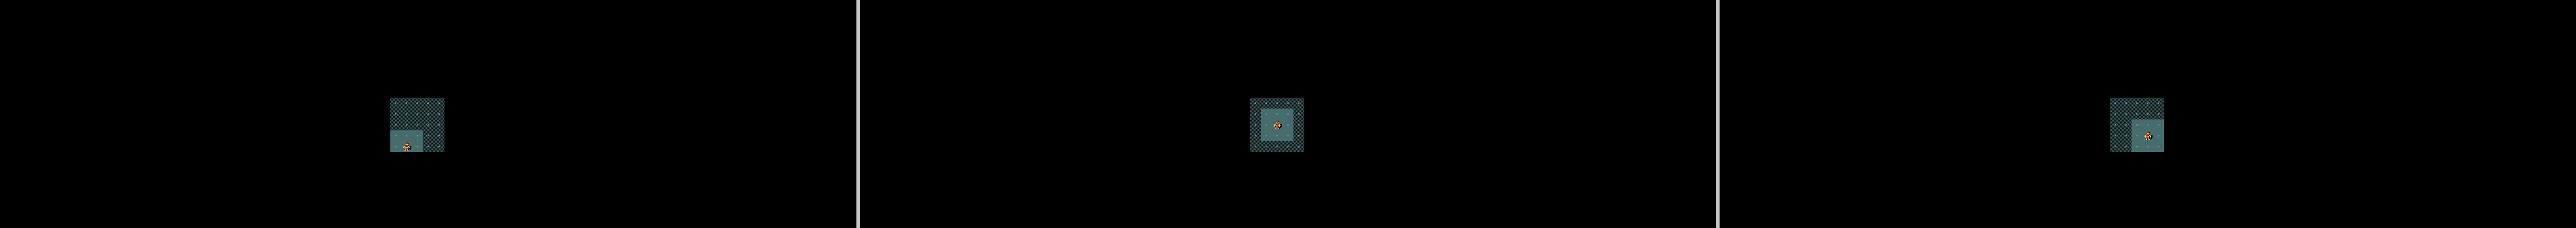

Levels with geometry: GEOMETRY:right,bottom


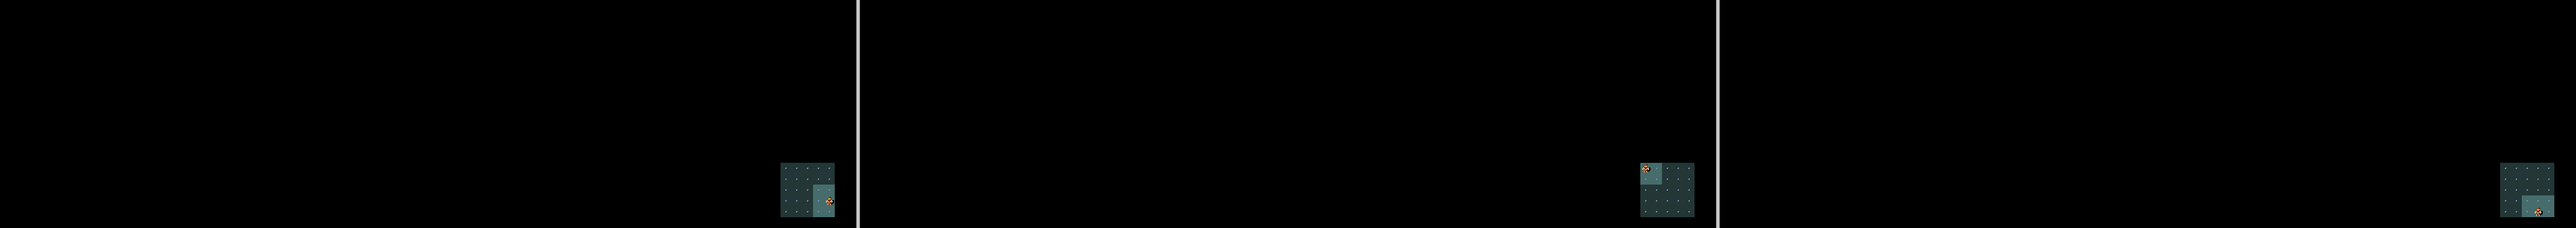

In [31]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:{},{}
MAP
.....
.....
.....
.....
.....
ENDMAP
"""
for geom_x, geom_y in [("left", "top"), ("center", "center"), ("right", "bottom")]:
    print("Levels with geometry: GEOMETRY:{},{}".format(geom_x, geom_y))
    render_des_file(des_file.format(geom_x, geom_y), n_images=3, full_screen=1)

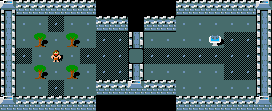

In [99]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
|-----     ------
|.....-- --.....|
|.T.T...-....K..|
|.......+.......|
|.T.T...-.......|
|.....-----.....|
|-----     ------
ENDMAP
BRANCH: (3,3,3,3),(4,4,4,4)
"""
render_des_file(des_file, n_images=1, full_screen=0)

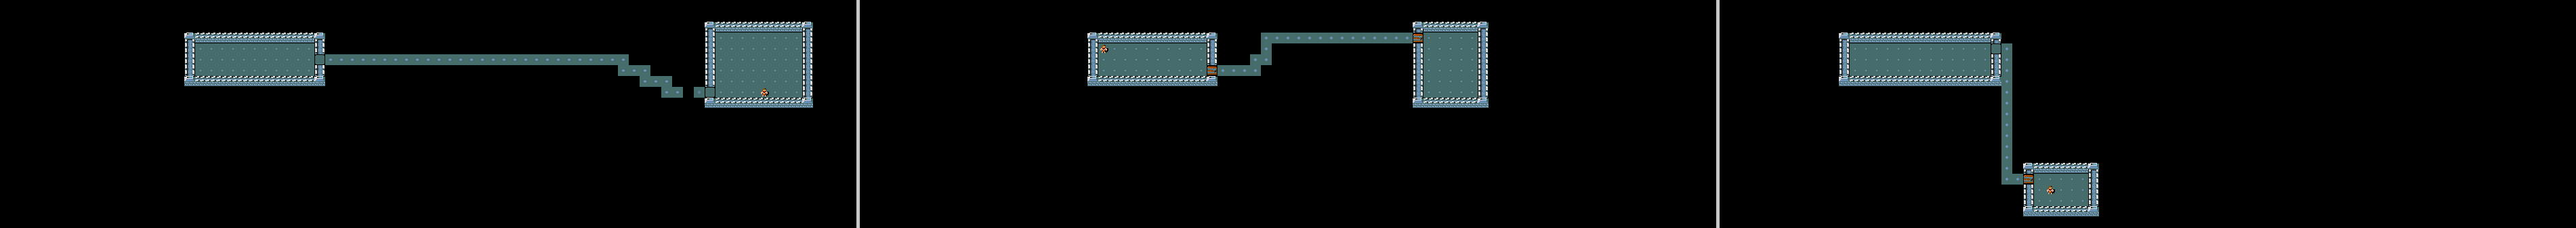

In [102]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped

ROOM: "ordinary" , lit, random, random, random {
}
ROOM: "ordinary" , lit, random, random, random {
}

RANDOM_CORRIDORS
"""
render_des_file(des_file, n_images=3, full_screen=True)

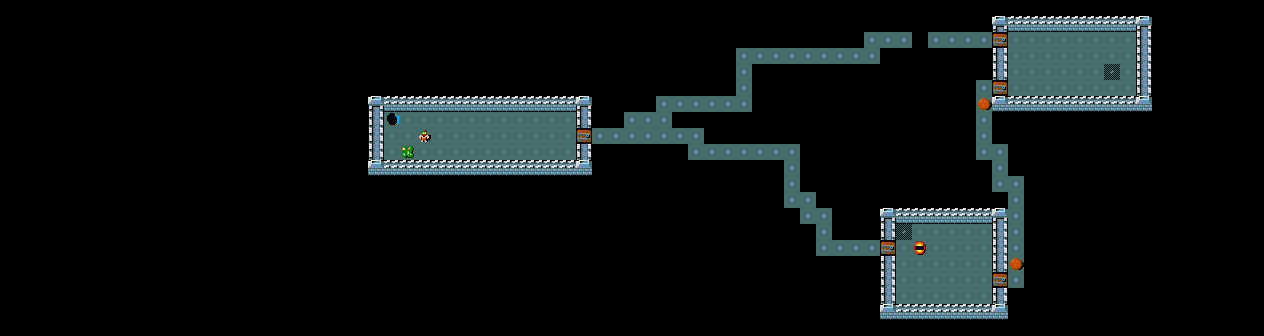

In [ ]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped
REGION: (0,0,20,80), lit, "ordinary"

ROOM: "ordinary" , lit, random, random, random {
    MONSTER: random, random
}
ROOM: "ordinary" , lit, random, random, random {
    MONSTER: ('F', "lichen"), random
    TRAP:"hole",(0,0)
}
ROOM: "ordinary" , lit, random, random, random {
    MONSTER: ('F', "red mold"), (0,0)
    TRAP: random, random
} 


RANDOM_CORRIDORS
"""
render_des_file(des_file, n_images=1, full_screen=True)


                                                                                
                                                                                
                                                                                
                                                  --------------                
                                                  |............|                
                                                  +............|                
                                                  |............|                
                                                 #.............|                
                                              ####----.-|-------                
                                                      # #                       
                                                      # #                       
                                                      ####    #                 
                           

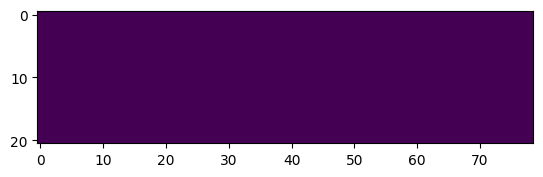

In [202]:
import gym
import minihack

des_file = """
LEVEL: "mylevel"
FLAGS: premapped
REGION: (0,0,20,80), lit, "ordinary"

ROOM: "ordinary" , lit, random, random, random {
    MONSTER: random, random
}
ROOM: "ordinary" , lit, random, random, random {
    MONSTER: ('F', "lichen"), random
    TRAP:"hole",(0,0)
}
ROOM: "ordinary" , lit, random, random, random {
    MONSTER: ('F', "red mold"), (0,0)
    TRAP: random, random
} 


RANDOM_CORRIDORS
"""
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file,
    max_episode_steps=50,
)

env.reset() # each reset generates a new environment instance
import numpy as np
import time

done = False
reward = [0.0]
while not done:
    action = env.action_space.sample()
    obs,r,done,rs = env.step(action)  # move agent '@' north
    reward.append(r + reward[-1])
    env.render()
    #print(obs["glyphs"].shape)
print(reward)
import matplotlib.pyplot as plt
plt.imshow(obs["glyphs"])

In [198]:
from minihack import MiniHackNavigation
from minihack.envs import register

class MiniHackNewTask(MiniHackNavigation):
    def __init__(self, *args, des_file, **kwargs):
        kwargs["max_episode_steps"] = kwargs.pop("max_episode_steps", 1000)
        super().__init__(*args, des_file=des_file, **kwargs)

register(
    id="MiniHack-NewTask-v0",
    entry_point="path.to.file:MiniHackNewTask", # use the actual the path
)

In [199]:
from minihack import LevelGenerator
from minihack import RewardManager

# Define a 10x10 room and populate it with
# different objects, monster and features
lvl_gen = LevelGenerator(w=10, h=10)
lvl_gen.add_object("apple", "%")
lvl_gen.add_object("dagger", ")")
lvl_gen.add_trap(name="teleport")
lvl_gen.add_sink()
lvl_gen.add_monster("goblin")
lvl_gen.fill_terrain("rect", "L",
    0, 0, 9, 9)

# Define a reward manager
reward_manager = RewardManager()
# +1 reward and termination for eating
# an apple or wielding a dagger
reward_manager.add_eat_event("apple")
reward_manager.add_wield_event("dagger")
# -1 reward for standing on a sink
# but isn't required for terminating
# the episode
reward_manager.add_location_event("sink",
    reward=-1, terminal_required=False)

env = gym.make(
    "MiniHack-Skill-Custom-v0",
    des_file=lvl_gen.get_des(),
    reward_manager=reward_manager,
)